Applied Data Science

ASSIGNMENT-3

Name : Mokesh k

**Penguin Classification Analysis                   
Problem Statement:**                     
The Penguin Classification Analysis problem involves predicting the species of a penguin
based on various physical characteristics. The dataset includes information about the body
mass, culmen length, culmen depth, flipper length, and sex of different penguin species.
The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguins.
Accurate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species.

Attribute Information:
 Species: penguin species (Chinstrap, Adélie, or Gentoo)
 Island: island name (Dream, Torgersen, or Biscoe) in Antarctica
 culmen_length_mm: culmen length (mm)
 culmen_depth_mm: culmen depth (mm)
 flipper_length_mm: flipper length (mm)
 body_mass_g: body mass (g)
 Sex: penguin sex

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken
using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the
first feathers depending on the standard chosen.

Perform the below Tasks to complete the Assignment:-
Clustering the data and performing classification algorithms
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.

 Univariate Analysis
 Bi- Variate Analysis
 Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Scaling the data
9. Perform any of the clustering algorithms
10. Add the cluster data with the primary dataset
11. Split the data into dependent and independent variables.
12. Split the data into training and testing
13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score,f1_score,recall_score

Download the dataset:

Load the dataset into the tool.

In [ ]:
df = pd.read_csv('penguins_size.csv')

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Uni-Variate Analysis

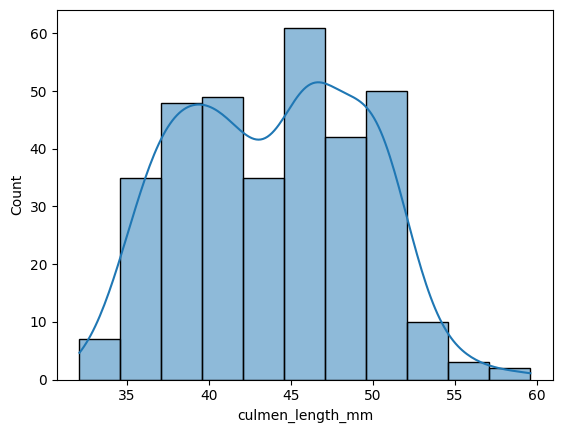

In [ ]:
sns.histplot(data=df, x='culmen_length_mm', kde=True)
plt.show()

Bi-Variate Analysis

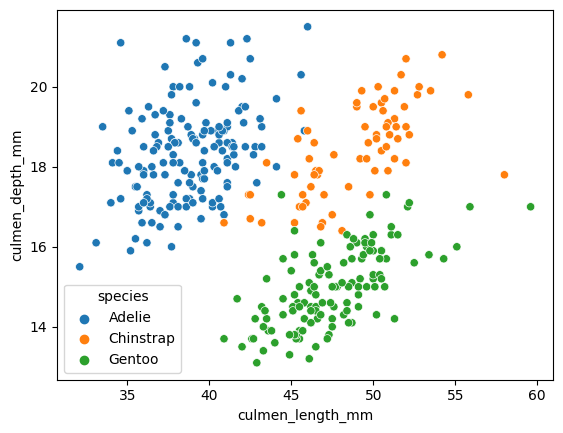

In [ ]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

Multivariate Analysis

<ipython-input-116-8890f97a76ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


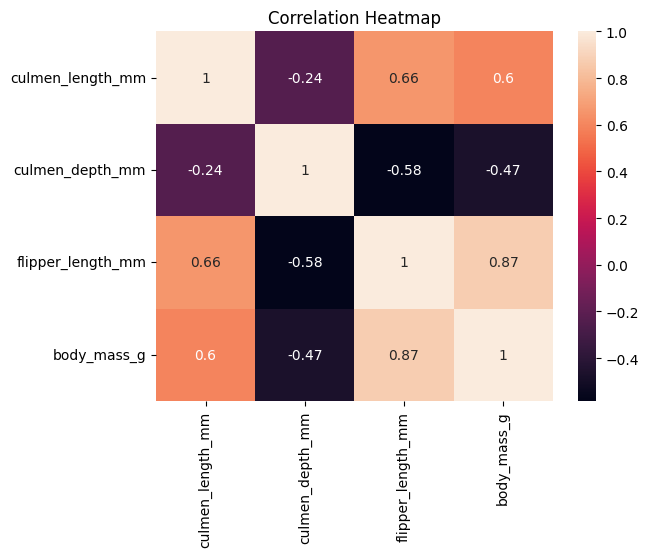

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


HANDLING MISSING VALUES

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df = df.dropna()

Replace outliers,
 Identify outliers using boxplots or other methods,
 Replace outliers with appropriate values or remove them.


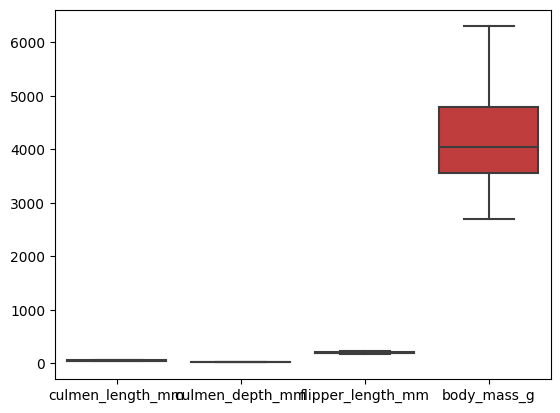

In [ ]:
sns.boxplot(data=df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.show()

# Example: Replacing outliers with median value
for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

Categorical columns and perform encoding.

In [ ]:
# Check for categorical columns
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

# One-hot encoding for 'Island' column
df = pd.get_dummies(df, columns=['island'])

Scaling the data

In [ ]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('species', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])

10. Cluster data with the primary dataset,using Kmeans clustering algorithm.

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_encoded)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Cluster'] = cluster_labels

In [ ]:
df.columns

Index(['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'island_Biscoe', 'island_Dream',
       'island_Torgersen', 'Cluster'],
      dtype='object')

Split the data into dependent and independent variables.

In [ ]:
X = df.drop(['species', 'Cluster'], axis=1)
y = df['species']


Split the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Model

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

Measure the performance using Metrics.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9850746268656716
Precision: 0.986140724946695
Recall: 0.9850746268656716
F1-score: 0.9852286835404036
